In [1]:
import tweepy
import textblob 

In [13]:
from matplotlib import pyplot as plt
import pandas as pd 
%matplotlib inline 

In [34]:
## note these tweets may contain tweets from other computitors also as they sometime mention @ADP also
## take example for this tweet https://twitter.com/williamtincup/status/1006921815938228224


In [5]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_key)

In [26]:
print(auth.get_username())
api = tweepy.API(auth)
tweet = tweepy.Cursor(api.search,q='@RajnishRoyale',tweet_mode='extended').items(100)

RajnishRoyale


In [30]:
## this will return time aws UTC time zone
## sample  just printing the tweet with extended mode to get the full text instad of 140 char only
for tweet2 in tweepy.Cursor(api.search,q='Amazon',tweet_mode='extended').items(10):
    print(tweet2.full_text)
    print(tweet2.created_at)
    print(tweet2.source)
    print(tweet2.author.name)

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=Amazon&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000016A538FC0B8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

note tha the full text mode and without full text mode both of these tweet's polarity will vary
in fdull text mode it tokenizes all the text there in the tweet but in case of default it only takes 140 character 
from the tweet 
so probably it will be a good idea to alwasy use full text (extended mode )

how lets take exmaple 
case 1:-
var = textblob.TextBlob("@Forbes @ADP Word of caution be extremely careful about the layers of bureaucracy in your company can make it very difficult to change direction Not to mention the operating costs I have found always run Lean at optimal operating capacity Forget about the fluff")

var.sentiment.polarity ### polarity wil come -0.2833333333333333
btu when you use defaul 
yiu will gety text vas :- @Forbes @ADP Word of caution be extremely careful about the layers of bureaucracy in your company can make it very… https://t.co/toGrEjmI5I
and its priolarize will come ---- -0.1


##### https://www.youtube.com/watch?v=qZgx0pMR-Ps
################### twitter API
twitter has two APIs one is to return existing data 
and one to return live streaming data 
to retreve we can use two method
1.:- api.search (q=,count='',since_id,....)... :- ## in this you may get maximum of 100 tweets or so
2.:- using Cursor api.Cursor(api.search,q='@ADP').items(10000) ## in this you can get large number of tweets 

############# some of the param in api.Cursor since="2015-10-10", 
              until="2015-10-11",
              count=100).items())
              

In [18]:
consumer_key ="d9UoOJfbWpCgDDST7fNf6y4cv"
consumer_secret_key = "wq0pycYoPOzpJcFaBTlIGaH2yLDjzSwXIvh73noeHfBUsopehr"
access_token = "216746923-OdKqx1DkbjF0LX88z0l2vvkmn9PbM0YF0Ibcf1A9"
access_token_key = "zaYVpg7yvssb3fwU24ajxEy09EKqSnyCWzNSOEQMPiFWm"


In [19]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_key)


In [21]:
## ust for fun to get username and itrs followers .... 
## practice
api = tweepy.API(auth)
# usr = api.get_user('ADP')
# print(usr.screen_name)
# print (usr.followers_count)

In [24]:
## this will return time aws UTC time zone
## sample  just printing the tweet with extended mode to get the full text instad of 140 char only
for tweet2 in tweepy.Cursor(api.search,q='@RajnishRoyale',tweet_mode='extended').items(10):
    print(tweet2.full_text)
    print(tweet2.created_at)
    print(tweet2.source)
    print(tweet2.author.name)

In [25]:
## in extended mode 
dataFrame = pd.DataFrame() ## creating a dataframe to store the tweets and its attributes
text=[]                    ## to hold the attributes of tweets
text2=[]
text3=[]
text4 =[]
api = tweepy.API(auth)
## for tweet in tweepy.Cursor(api.search,q='@ADP',lang='en',tweet_mode="extended").items(10):
## print(tweet.full_text)
for tweet in tweepy.Cursor(api.search,q='@ADP',lang='en',tweet_mode='extended').items(1000):
    text.append(tweet.full_text)
    text2.append(tweet.created_at)
    text3.append(tweet.source)
    text4.append(tweet.author.name)
#     dataFrame["text"] = [tweet.text]    
#     dataFrame["created_date"] = [tweet.created_at]
#     dataFrame["Source"] = [tweet.source]
#     dataFrame["user_name"] = [tweet.author.name]

In [ ]:
# ## in default  mode 
# dataFrame = pd.DataFrame() ## creating a dataframe to store the tweets and its attributes
# text=[]                    ## to hold the attributes of tweets
# text2=[]
# text3=[]
# text4 =[]
# api = tweepy.API(auth)
# ## for tweet in tweepy.Cursor(api.search,q='@ADP',lang='en',tweet_mode="extended").items(10):
# ## print(tweet.full_text)
# for tweet in tweepy.Cursor(api.search,q='@ADP',lang='en',tweet_mode='extended').items(1000):
#     text.append(tweet.full_text)
#     text2.append(tweet.created_at)
#     text3.append(tweet.source)
#     text4.append(tweet.author.name)
# #     dataFrame["text"] = [tweet.text]    
# #     dataFrame["created_date"] = [tweet.created_at]
# #     dataFrame["Source"] = [tweet.source]
# #     dataFrame["user_name"] = [tweet.author.name]

In [26]:
dataFrame["text"] = text
dataFrame["created_date"] = text2
dataFrame["Source"] = text3
dataFrame["user_name"] = text4

In [27]:
## dataFrame.head()
dataFrame.shape

(670, 4)

In [28]:
## sentimental analysys of text atribute of the dataframe and storing it into list
analysis=[]
for row in dataFrame['text']:
    x = textblob.TextBlob(row)
    print(x.sentiment.polarity)
    analysis.append(x.sentiment.polarity)
    

0.06818181818181818
-0.03181818181818183
0.0
0.35
-0.2
0.39285714285714285
-0.2
-0.2
-0.2833333333333333
-0.2
-0.2
-0.2
-0.2
-0.2
0.25
-0.2
-0.2
-0.2
-0.2
0.0
-0.2
0.0
-0.2
-0.2
-0.2
-0.2
-0.2
-0.2
0.2
0.3666666666666667
-0.25
0.13939393939393938
0.2681818181818182
0.35
0.35
0.625
0.35
1.0
-0.1
0.16666666666666666
0.0
0.0
0.9
0.0
0.0
0.625
-0.25
0.0
-0.25
0.15744949494949492
0.0
0.0
0.5
0.33
0.0
0.9
-0.018518518518518528
0.0
0.13636363636363635
0.0
1.0
1.0
0.0
0.9666666666666667
0.0
-0.05
0.625
0.9
0.25
0.6354166666666666
0.375
0.0
0.0
0.0
0.0
-0.15555555555555559
0.594047619047619
0.8
-0.20833333333333331
0.0
0.625
0.0
0.05
0.4
1.0
0.175
0.0
0.8
0.13636363636363635
1.0
0.06818181818181818
0.5
0.0
0.0
0.0
0.22999999999999998
0.65
0.0
0.0
0.2
0.2
1.0
0.2
-0.09513888888888887
0.15000000000000002
0.625
0.5
0.6
0.125
0.625
0.0
0.0
0.0
0.225
0.0
0.7
0.7
0.15625
0.0
0.10277777777777779
0.0
1.0
-0.033333333333333326
0.8125
0.0
-0.2
0.5
0.0
0.625
0.0
0.35714285714285715
0.0
0.0
0.0
0.0
0.13636

In [29]:
## putting all the pilarity in one column and attaching it to dataframe
dataFrame["Polarity"] = analysis

In [30]:
## creating enw dataframe with tweets only with negative piolarity
dataframe_negative = dataFrame[dataFrame['Polarity']<0]

In [31]:
## checking number of negative tweets
negative_tweet = dataframe_negative.shape[0]
total_tweet = dataFrame.shape[0]

In [32]:
## writing both tweets and negative tweets in excel  both tweet mean the full tweets and the negative tweets
writer = pd.ExcelWriter('Tweet_analysis16_full_Text.xlsx')
dataFrame.to_excel(writer,sheet_name='Original_Tweets')
dataframe_negative.to_excel(writer,sheet_name='Negative_Tweets')
writer.save()

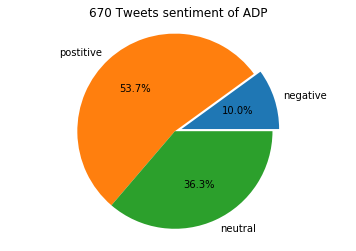

In [33]:
## tweet from file Tweet_analysis
## pie chart for visualization
negative = dataframe_negative.shape[0] ## calculating total negative tweets
postitive = dataFrame[dataFrame['Polarity']>0].shape[0]  ## calculating total positive tweets
neutral =   dataFrame[dataFrame['Polarity']==0].shape[0]  ## ## calculating neutral negative tweets
## print(negative,postitive,neutral)
title = str(dataFrame.shape[0])+" "+"Tweets sentiment of ADP"
plt.pie([negative,postitive,neutral],labels=['negative','postitive','neutral'],radius=1.4,autopct='%.1f%%',explode=[0.1,0,0])
plt.axis("equal")
plt.title(title)
plt.show()


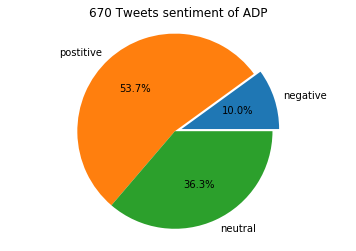

In [34]:
## tweet from file Tweet_analysis14
## pie chart for visualization
negative = dataframe_negative.shape[0]
postitive = dataFrame[dataFrame['Polarity']>0].shape[0]
neutral =   dataFrame[dataFrame['Polarity']==0].shape[0]
## print(negative,postitive,neutral)
title = str(dataFrame.shape[0])+" "+"Tweets sentiment of ADP"
plt.pie([negative,postitive,neutral],labels=['negative','postitive','neutral'],radius=1.4,autopct='%.1f%%',explode=[0.1,0,0])
plt.axis("equal")
plt.title(title)
plt.show()


 ####################################            Practicing with TextBlob ###########################################

In [183]:
print(dataFrame.shape[0],'Tweets sentiment of ADP')

587 Tweets sentiment of ADP


219

In [79]:
### sentimental analysis
# var = textblob.TextBlob("fucking  fucking fucking fucking fucking angry good i am good sorry sorry")
# var = textblob.TextBlob("@Forbes @ADP Word of caution be extremely careful about the layers of bureaucracy in your company can make it very difficult to change direction Not to mention the operating costs I have found always run Lean at optimal operating capacity Forget about the fluff")
# var.sentiment.polarity
## COOL THINGS HOW strong textBlob is 
# var = textblob.TextBlob("BUT THIS IS NOT BAD THIS IS WORST")
# var.sentiment.polarity

var = textblob.TextBlob("i stopped repeating my mistakes for a good reason")
print(var.sentiment.polarity)
print(type(var.sentiment))
      



0.7
<class 'textblob.en.sentiments.Sentiment'>


In [11]:
## to create a excel with the text of tweet
## practice
count = 0;
for tweet in tweepy.Cursor(api.search,q='@ADP').items(500):
    print(tweet.text)
    print('\n')
    count = count + 1
    savefile = open('ss2.csv','a',encoding='utf-8')
    savefile.write(tweet.text)
    savefile.write('\n')
    savefile.close()
    
    

RT @WorkVoicePay: New research from @ADP shows, "nearly a third (28%) of Europe’s workforce say they are worried that their job will be aut…


RT @WorkVoicePay: "Machines could replace thousands of employees in as few as five years," according to new research from @ADP. “Work must…


@ADP I can’t input bank details so have not been paid. I’ve emailed but no response. Any update on when you will re… https://t.co/hpRsBatu8O


RT @ADP: En combinant paie et RH, vous faites plus que rémunérer vos collaborateurs. Vous les connaissez vraiment et leur permettez de révé…


RT @ADP: L'attività prospera quando il personale è coinvolto. Ma cosa pensano davvero i tuoi dipendenti? Leggi il rapporto Workforce View d…


@juliettebohm @ADP Lol. Merci. 
ps : c était pas ma valise ouf


@pic_delph @ADP Bonnes vacanced b....


RT @ADP: We're honored to have celebrated the Inaugural ADP Marketplace Partner Connections Summit with our leading solutions partners. Tha…


RT @Forbes: ADPVoice: Does your firm n

.@ADP partnership w/ @Microsoft Dynamics provides orgs leveraging #ADPWorkforceNow #HCM platform &amp; @MSFTDynamics365… https://t.co/nF5k4NG3S0


RT @fairygodboss: Join us on Monday for an informative discussion with women at @ADP about how best to navigate and adapt to change in your…


Join us on Monday for an informative discussion with women at @ADP about how best to navigate and adapt to change i… https://t.co/A2YyOQqZjX


RT @valerie_expert: @ADP toujours aussi honte de nos aéroports. Champion pour les boutiques de luxe mais l'accueil des voyageurs c'est pas…


RT @AmyG_NH: .@ADP partnership with Slack – facilitating access to #HR &amp; #payroll info #ADPMarketplace https://t.co/fGTBTAUmQj


#DataThon 2018 presenting Brilliant Products leveraging ADP Brilliant Data!  Proud of my #datascience team and part… https://t.co/QF5mHpv7oV


.@ADP partnership with Slack – facilitating access to #HR &amp; #payroll info #ADPMarketplace https://t.co/fGTBTAUmQj


Découverte Métier – Chief Pri

Great chat with @mrbonomo at @ADP ! 

My referrals are most often about the person, not the company.

If you have p… https://t.co/pJQeu2BtmT


The #DigitalList 🏅(76-81):

76. @github - version control
77. @basecamp - project management
78. @mondaydotcom - Te… https://t.co/blisDCaBQK


@CryptoCoinMakr Yo @ADP what the actual fuck is going on here?


So glad to have @jrepperm_mary Mary Reppermund, Vice President Comprehensive Services, HCM Solutions of @ADP as our… https://t.co/AiAsU9eQZA


@ADP SmartCompliance has been recognized by the American Business Awards, or @TheStevieAwards  in seven categories:… https://t.co/g9olGI0Cil


RT @realDrPane: Ok here we go...the number of cans in the donut is...1,483! Congrats to Krystal Elms of Seim Johnson LLP with the closest g…


@adp is recruiting an Analyste Programmeur  Apply now !- Talent2Africa (T2A) - https://t.co/zFQ4RYRm7h via… https://t.co/WJ5SDNB6pF


RT @ACGBoston: A very special thanks to our #DealFest Northeast '18 sponsors! @ADP @BD

RT @blue_prism: Our partners can make #RPA goals a reality. @ADP worked with @SymphonyVenture to scale an international program quickly, al…


calling all Female Founders, the amazing team @monarqincubator is now taking apps for the Cohort III class.  Apply… https://t.co/njq9IVszrt


RT @SymphonyVenture: Our COO @Dave_Brain and the incomparable @TDav share how Symphony's RPA enabled process transformation brought huge wi…


RT @SymphonyVenture: Our COO @Dave_Brain and the incomparable @TDav share how Symphony's RPA enabled process transformation brought huge wi…


RT @SymphonyVenture: Our COO @Dave_Brain and the incomparable @TDav share how Symphony's RPA enabled process transformation brought huge wi…


RT @grazia_fr: Une séance de yoga gratuite en attendant votre vol, ça vous tente ? 😅😮 #Sport #Lifestyle #Yoga @ADP https://t.co/AlVXln0xhk


RT @SymphonyVenture: Our COO @Dave_Brain and the incomparable @TDav share how Symphony's RPA enabled process transformation brought huge wi…


Ou

RT @Juanico: Le gouvernement s’apprête à vendre les « bijoux de famille » @FDJ @ADP @ENGIEgroup : pourquoi la décision de privatiser la Fra…


RT @Juanico: Le gouvernement s’apprête à vendre les « bijoux de famille » @FDJ @ADP @ENGIEgroup : pourquoi la décision de privatiser la Fra…


RT @ADP: Fun Fact: Adjusting your management style could increase employee engagement. See how: https://t.co/GmwwbE00vQ https://t.co/56NqEm…


RT @Forbes: ADPVoice: How hiring with diversity in mind leads to a smarter team @ADP https://t.co/atLFYlj3NY https://t.co/TqnrutWf8a


RT @Forbes: ADPVoice: How hiring with diversity in mind leads to a smarter team @ADP https://t.co/atLFYlj3NY https://t.co/TqnrutWf8a


RT @Forbes: ADPVoice: How hiring with diversity in mind leads to a smarter team @ADP https://t.co/atLFYlj3NY https://t.co/TqnrutWf8a


RT @ADP: Don't just pay your employees, know your people. Discover your workplace as it should be. Discover the Workforce of 2018. #PeopleU…


RT @Juanico: Le gouvern

RT @Skyword: We are 2 days away from #Forward18! Hurry and register today to join #marketers from @ADP, @IBMSecurity, @siriusdecisions @sag…


RT @WorkVoicePay: New research from @ADP shows, "nearly a third (28%) of Europe’s workforce say they are worried that their job will be aut…


Thank you @ADP (more specifically Brian Q Garcia) and @UPS thank you sooooooo much for knowing how important this w… https://t.co/XEIvGVT7Hl


RT @ADP: En combinant paie et RH, vous faites plus que rémunérer vos collaborateurs. Vous les connaissez vraiment et leur permettez de révé…


"Machines could replace thousands of employees in as few as five years," according to new research from @ADP. “Work… https://t.co/s0t1uiMIP5


"By the time the information got to employees, they had forgotten about the survey, and it hardly seemed relevant a… https://t.co/1xWZmfH26B


The most brilliant minds in the field of #labor economics will convene on Monday, June 11th for the 2nd Annual @ADP… https://t.co/X2i1jaHAJ4



RT @sodexoUSA: Let's make this generation the generation that ENDS hunger! Tonight we are celebrating the efforts of @StopHungerUSA and our…


RT @ADP: Excited for ADP’s Chief Behavioral Economist @JordanBirnbaum to present his session "How to Drive a Consultative Mindset Using Beh…


RT @sodexoUSA: Let's make this generation the generation that ENDS hunger! Tonight we are celebrating the efforts of @StopHungerUSA and our…


@waggl_it @SocialChorus @ADP @SlackHQ @CornerstoneInc @UltimateHCM Congrats on the successful round!


RT @sodexoUSA: Let's make this generation the generation that ENDS hunger! Tonight we are celebrating the efforts of @StopHungerUSA and our…


RT @sodexoUSA: Congratulations to our 2018 @StopHungerUSA champion @ADP! Their continued support has helped us move closer each year to our…


RT @Nasdaq: What industries are seeing exceptional wage growth? @ADP enlightens recent graduates and the #TradeTalks team. Tune in to find…


RT @sodexoUSA: Let's make this generatio

In [58]:
var = textblob.TextBlob("@Forbes @ADP Word of caution be extremely careful about the layers of bureaucracy in your company can make it very difficult to change direction Not to mention the operating costs I have found always run Lean at optimal operating capacity Forget about the fluff")
var.words

WordList(['Forbes', 'ADP', 'Word', 'of', 'caution', 'be', 'extremely', 'careful', 'about', 'the', 'layers', 'of', 'bureaucracy', 'in', 'your', 'company', 'can', 'make', 'it', 'very', 'difficult', 'to', 'change', 'direction', 'Not', 'to', 'mention', 'the', 'operating', 'costs', 'I', 'have', 'found', 'always', 'run', 'Lean', 'at', 'optimal', 'operating', 'capacity', 'Forget', 'about', 'the', 'fluff'])

In [57]:
## to dowload nltk you have to specify download nlk command and one app will open just click dowenlaod all it will take sometume
## as it has huge amount of data may be 3 to 4 gb
import nltk
## nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [84]:
## working with textblob

text = open('Book_alaxendar.txt')
text = text.read()
blob = textblob.TextBlob(text)
##for line in blob:
  ##  print(blob.sentences)
##blob.sentences[1]

# 2.for line in blob.sentences:
#     if('Alexander' in line):
#         print(line)

# 3. for line in blob.sentences:
#     if len(line)>100:
#         print(line)

## print the noun in the sentences of the blob
print(blob.noun_phrases)
## determine the polarity of the paragraph of text file
print(blob.polarity)

## subjectivity and objectivity
tex = textblob.TextBlob("dogs are good")

print(tex.subjectivity)

tex = textblob.TextBlob("earth is round ")
print(tex.subjectivity)
## subjective is one person point of view
## objectrive is more factual and is not driven by emotions ....
## transating a terxt or a paragraph

## codes for language are here 
## https://cloud.google.com/translate/docs/languages
print(blob.translate(to='hi'))

['alexander', 'ancient greek month', 'hekatombaion', 'july', 'bc', 'exact date', 'pella', 'kingdom', 'macedon', 'macedon', 'philip ii', 'olympias', 'neoptolemus', 'epirus', 'philip', 'olympias', 'principal wife', 'alexander', 'statue', 'alexander', 'thessaloniki', 'macedonia', 'greece', 'legends surround', 'alexander', "'s birth", 'according', 'ancient greek biographer', 'plutarch', 'philip', 'olympias', 'thunder bolt', 'sometime', 'philip', "wife 's womb", "lion 's image", 'plutarch', 'olympias', 'alexander', "'s father", 'zeus', 'ancient commentators', 'olympias', 'alexander', "'s divine parentage", 'alexander', 'alexander', 'philip', 'potidea', 'chalcidice', 'philip', 'parmenion', 'illyrian', 'paeonian', 'artemis', 'ephesus', 'wonders', 'hegesias', 'magnesia', 'artemis', 'alexander', 'such legends', 'alexander', 'own instigation', 'early years', 'alexander', 'lanike', 'alexander', "'s future general", 'cleitus', 'black', 'alexander', 'leonidas', 'lysimachus', 'acarnania', 'alexander